In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pathlib
import glob
from natsort import natsorted
from scipy.ndimage.filters import gaussian_filter1d
import datapane as dp
import altair as alt

In [230]:
df = pd.read_csv("cube_data.csv", index_col=0)
report = dp.Report(dp.Table(df))
report.publish(name="cube_data", visibility='PUBLIC')
report.save(path='cube_data.html', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/EnkrateiaLucca/reports/cube_data_c6387de7/


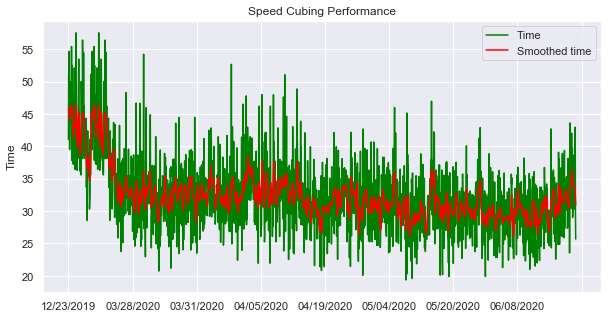

In [137]:
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d

time_smooth = gaussian_filter1d(df["Time"], sigma=2)
#df.set_index('Date',inplace=True)
fig, ax = plt.subplots(figsize=(10,5))
df.plot(y="Time",ax=ax,color="green")
plt.plot(time_smooth, color="red", label="Smoothed time")
plt.xlabel("")
plt.ylabel("Time")
plt.title("Speed Cubing Performance")
plt.legend()
plt.savefig("cube_raw_data.png")
plt.show()

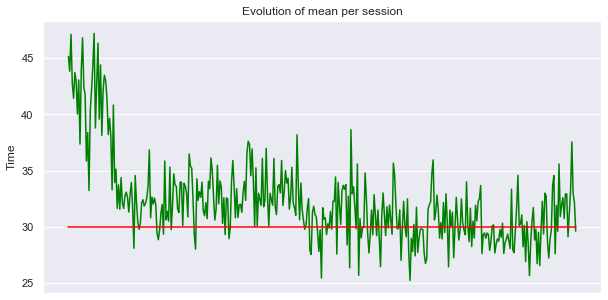

In [210]:
session_mean = []

for i in range(0,len(df)-1,5):
    session = list(df["Time"][i:i+5])
    session.remove(np.min(session))
    session.remove(np.max(session))
    session_mean.append(np.mean(session))
    
plt.figure(figsize=(10,5))
plt.plot(session_mean, color="green")
plt.plot([30 for _ in range(len(session_mean))], color="red")
plt.title("Evolution of mean per session")
plt.ylabel("Time")
plt.xticks([])
plt.savefig("mean_evolution.png")
plt.show()    


In [229]:

# Last 500 solves
mean_500 = np.round(df["Time"][-500:].mean(),2)
mean_100 = np.round(df["Time"][-100:].mean(),2)
# All time mean
all_time_mean = np.round(df["Time"].mean(),2)
# All time best time
all_time_best = np.round(df["Time"].min(),2)

print("{0:15}{1:15}{2:15}{3:15}".format("Average-500", "Average-100", "Average-all", "Best Time"))
print("{0:8}{1:15}{2:14}{3:15}".format(mean_500,mean_100, all_time_mean, all_time_best))

Average-500    Average-100    Average-all    Best Time      
   30.23          32.16         32.46          19.36
